In [1]:
# Install necessary libraries (if needed)
# !pip install seaborn scikit-learn pandas matplotlib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:

df = pd.read_csv('/content/202203-divvy-tripdata.csv')  # Adjust if your file path is different
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member


In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Confirm cleanup
print(f"Shape after cleaning: {df.shape}")


ride_id                  0
rideable_type            1
started_at               1
ended_at                 1
start_station_name    1905
start_station_id      1905
end_station_name      3113
end_station_id        3113
start_lat                1
start_lng                1
end_lat                 35
end_lng                 35
member_casual            1
dtype: int64
Shape after cleaning: (86318, 13)


In [5]:
# Convert start and end times to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Create ride_length_minutes column
df['ride_length_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Check
df[['started_at', 'ended_at', 'ride_length_minutes']].head()



,started_at,ended_at,ride_length_minutes
0,2022-03-21 13:45:01,2022-03-21 13:51:18,6.283333
1,2022-03-16 09:37:16,2022-03-16 09:43:34,6.300000
2,2022-03-23 19:52:02,2022-03-23 19:54:48,2.766667
3,2022-03-01 19:12:26,2022-03-01 19:22:14,9.800000
4,2022-03-21 18:37:01,2022-03-21 19:19:11,42.166667


In [21]:
sns.displot(df['ride_length_minutes'].sample(1000), kde=True)
sns.histplot(df['ride_length_minutes'])
plt.close()


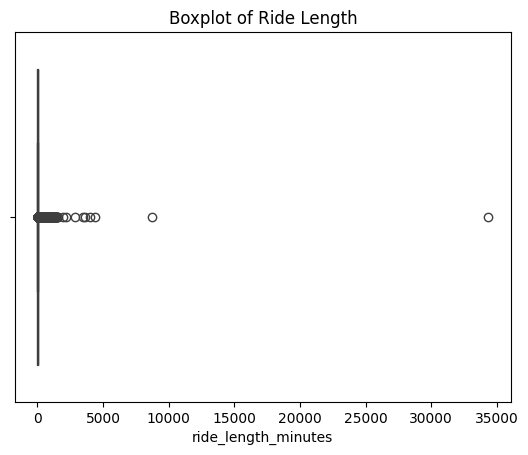

In [7]:
# Boxplot for ride length
sns.boxplot(x=df['ride_length_minutes'])
plt.title('Boxplot of Ride Length')
plt.show()


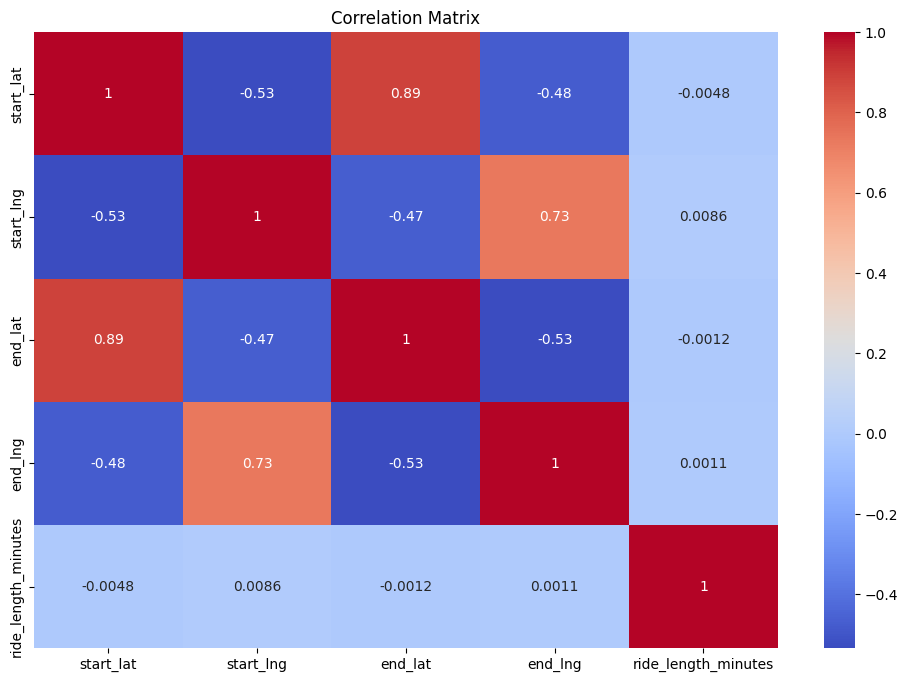

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now safely plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


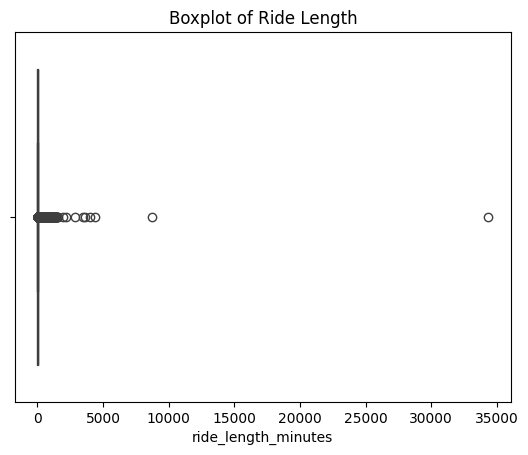

In [10]:
sns.boxplot(x=df['ride_length_minutes'])
plt.title('Boxplot of Ride Length')
plt.show()


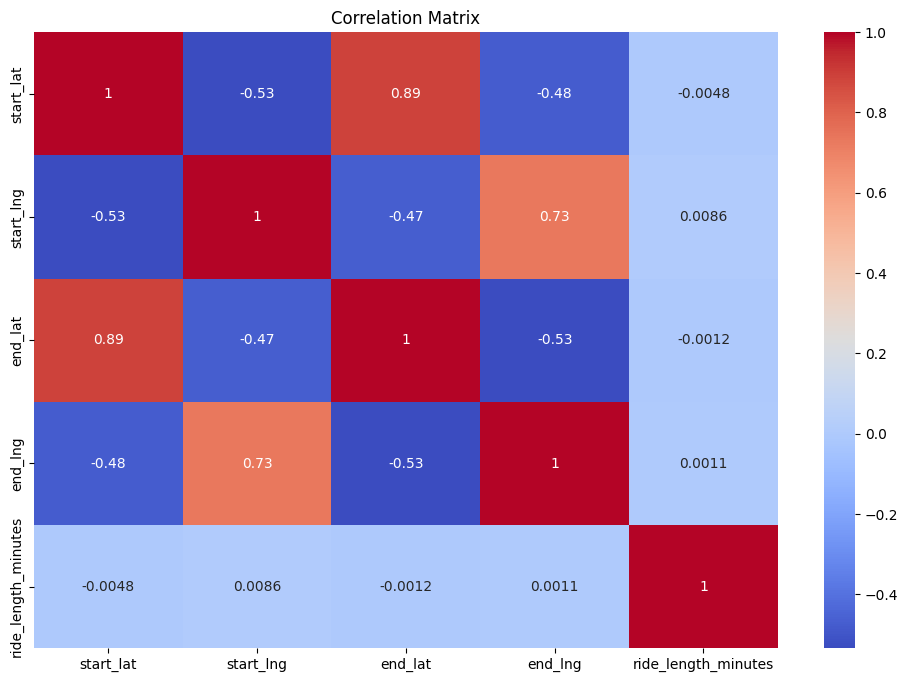

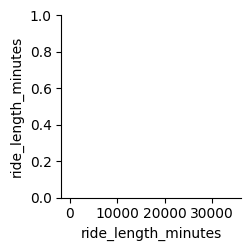

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for meaningful numeric columns
sns.pairplot(df[['ride_length_minutes', 'start_station_id', 'end_station_id']])
plt.show()



In [13]:
# Encode rider type (member_casual)
label_enc = LabelEncoder()
df['member_casual_encoded'] = label_enc.fit_transform(df['member_casual'])

# View encoding
df[['member_casual', 'member_casual_encoded']].head()


,member_casual,member_casual_encoded
0,member,1
1,member,1
2,member,1
3,member,1
4,member,1


In [15]:
# Convert station IDs to numeric
df['start_station_id'] = pd.to_numeric(df['start_station_id'], errors='coerce')
df['end_station_id'] = pd.to_numeric(df['end_station_id'], errors='coerce')

# Drop rows where conversion failed (optional but safe)
df.dropna(subset=['start_station_id', 'end_station_id'], inplace=True)

# Now apply MinMaxScaler
scaler = MinMaxScaler()
df[['ride_length_minutes', 'start_station_id', 'end_station_id']] = scaler.fit_transform(
    df[['ride_length_minutes', 'start_station_id', 'end_station_id']]
)

# View updated dataframe
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_minutes,member_casual_encoded
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,0.064319,Orleans St & Chestnut St (NEXT Apts),0.002964,41.900998,-87.623752,41.898203,-87.637536,member,0.000720,1
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,0.064650,Broadway & Ridge Ave,0.076845,41.978353,-87.659753,41.984045,-87.660274,member,0.000316,1
8,BD70E7114BC486F1,electric_bike,2022-03-17 17:32:44,2022-03-17 17:43:27,Western Ave & Winnebago Ave,0.064447,Dayton St & North Ave,0.064398,41.915544,-87.687070,41.910578,-87.649422,casual,0.001224,0
22,6C9DB4251DE99A1C,classic_bike,2022-03-08 17:18:57,2022-03-08 17:28:15,Wentworth Ave & Cermak Rd,0.064482,Wentworth Ave & 33rd St,0.076188,41.853085,-87.631931,41.834530,-87.631823,member,0.001062,1
32,608112A2196E188F,classic_bike,2022-03-18 08:28:01,2022-03-18 08:32:20,Elizabeth (May) St & Fulton St,0.065084,Sangamon St & Washington Blvd,0.066132,41.886616,-87.658040,41.883165,-87.651100,member,0.000493,1


In [16]:
X = df[['ride_length_minutes', 'start_station_id', 'end_station_id']]  # Features
y = df['member_casual_encoded']  # Target


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2053
           1       0.65      1.00      0.79      3828

    accuracy                           0.65      5881
   macro avg       0.58      0.50      0.39      5881
weighted avg       0.60      0.65      0.51      5881

Accuracy: 0.6509097092331236


In [19]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.65      0.49      0.56      2053
           1       0.76      0.86      0.81      3828

    accuracy                           0.73      5881
   macro avg       0.71      0.68      0.68      5881
weighted avg       0.72      0.73      0.72      5881

Accuracy: 0.7311681686787961


In [20]:
print("Model Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)*100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")


Model Comparison:
Logistic Regression Accuracy: 65.09%
Random Forest Accuracy: 73.12%
